![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Resolvendo sistemas especiais

## Questão 1: Algoritmo

Uma matriz é dita tridiagonal quando só possui entradas diferentes de zero na diagonal,
e imediatamente acima ou abaixo dela.

Explique porque, ao fazer a eliminação, o algoritmo só precisa operar nas três "diagonais centrais".
Inclusive, dê um exemplo de uma matriz, com muitos zeros, mas para a qual o algoritmo de eliminação
vai ter que acessar e calcular nas entradas correspondentes.

Elementos que não estejam nas diagonais principais são zero, logo, na execução do algoritmo, ou estará no fator, zerando toda uma equação, correspondente a uma das duas linhas de dada eliminação, e fazendo sobrar somente a outra, ou estará nos coeficientes de uma delas, zerando termos da equação e fazendo sobrar somente os com coeficientes que são elementos das diagonais principais. $$\begin{bmatrix} a_{11} & 0 & 0 \\ a_{21} & 0 & a_{23} \\ 0 & a_{32} & a_{33} \end{bmatrix}$$

Agora, escreva a função `tridiag_solve` para resolver sistemas tridiagonais, ou seja,
aqueles cuja matriz de coeficientes é tridiagonal.

Esta função deve realizar o algoritmo de eliminação,
mas, para ter uma boa performance, opere apenas nas entradas das diagonais centrais.

In [2]:
def tridiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float))
    b = np.copy(np.asarray(b, dtype=np.float))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    for k in range(0,n-1):        
        fator = -(A[k+1][k]/A[k][k])
        b[k+1] = b[k+1] + fator*b[k]
        A[k+1][k] = 0
        A[k+1][k+1] = A[k+1][k+1] + fator*A[k][k+1] 
    xs = []
    xs.append(b[m-1]/A[n-1][m-1])
    for i in range(m-1,0,-1):
        xs.append((b[i-1] - A[i-1][i]*xs[-1])/A[i-1][i-1])
    return xs[::-1]

Qual o papel do primeiro assert?

Confirmar que o número de colunas da matriz A, com coeficientes, é igual ao tamanho do vetor b, dos termos dependentes, $y_i$. 

In [3]:
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

x1 = np.linalg.solve(A,b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-14, rtol=1e-14), (x1,x2)

C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.copy(np.asarray(A, dtype=np.float))
C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.copy(np.asarray(b, dtype=np.float))


In [4]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.copy(np.asarray(A, dtype=np.float))
C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.copy(np.asarray(b, dtype=np.float))


Se você não tivesse acesso a `np.linalg.solve`, como você poderia testar sua função?
Explique abaixo, e dê um exemplo de teste na caixa seguinte.

A função retorna os valores de x em uma matriz 1 por m, ou um vetor de tamanho m, então podemos fazer a multiplicação de matrizes entre ela a matriz dos coeficientes, A. O resultado é um vetor que, se a função tiver sido implementada corretamente,deve ser igual ao vetor b, usado para encontrar os x. 

In [5]:
# Exemplo de teste
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]
n,m = np.shape(A)
x1 = tridiag_solve(A, b)
for l in range(m):
    sum = 0
    for i in range(n):
        sum += A[l][i]*x1[i]
    assert sum == b[l]  


C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.copy(np.asarray(A, dtype=np.float))
C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.copy(np.asarray(b, dtype=np.float))


## Questão 2: Tempos

Para cada um dos `ns` dados a seguir, monte um sistema tridiagonal $n \times n$,
e calcule o tempo (usando `time`) para:
1. Criar a matriz A e o vetor b (podem ser aleatórios, podem não ser)
2. Resolver o sistema usando `tridiag_solve`

Armazene os tempos em duas listas, `t_create` e `t_solve`.

Obs: o caixa abaixo pode usar algo como 2G de RAM, por conta das matrizes 8k
(ou até mais, dependendo de **como** você criar as matrizes).
Assim, para testar, diminua a amplitude do logspace, terminando em $2^{10}$ em vez de $2^{13}$.
Se você não conseguir fazer funcionar até $2^{13}$,
reduza o maior valor do `logspace`, mas não reduza demais.

In [6]:
ns = np.logspace(4,13, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    start = time()
    dig = np.full(n-1, -1)
    A = np.diag(np.random.randint(1,100, n)) + np.diag(dig, k=1) + np.diag(dig[::-1], k=-1)
    b = np.random.randn(n)
    finish = time()
    t_create.append(finish-start)
    
    start = time()
    x = tridiag_solve(A,b)
    finish = time()
    t_solve.append(finish-start)


C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.copy(np.asarray(A, dtype=np.float))
C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.copy(np.asarray(b, dtype=np.float))


Agora, faça um gráfico destes tempos, em função de $n$.

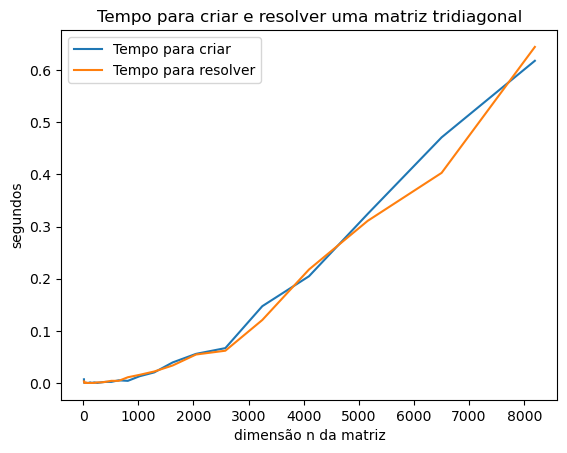

In [7]:

plt.plot(ns, t_create, label="Tempo para criar")
plt.plot(ns, t_solve, label="Tempo para resolver")
plt.ylabel('segundos')
plt.xlabel('dimensão n da matriz')
plt.legend()
plt.title("Tempo para criar e resolver uma matriz tridiagonal")
ax = plt.gca()

In [8]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

In [9]:
for l in ax.lines:
    xs = l.get_xdata()
    assert min(xs) == 2**4
    assert max(xs) <= 2**13

In [10]:
ax = None

Qual etapa demora mais?
Porquê você acha que isso acontece?

A criação demora mais, possivelmente porque embora seja tridiagonal, o cógido terá que explicitar que os elementos fora das diagonais principais são cada um igual a zero. Já na hora de resolver, esses elementos não são considerados para nada, somente os da diagonais principais.

Agora, faça novos gráficos, para tentar descobrir a taxa de crescimento destes tempos:
se é linear, quadrático, exponencial, ... em função de $n$.

E se são a mesma taxa ou não!

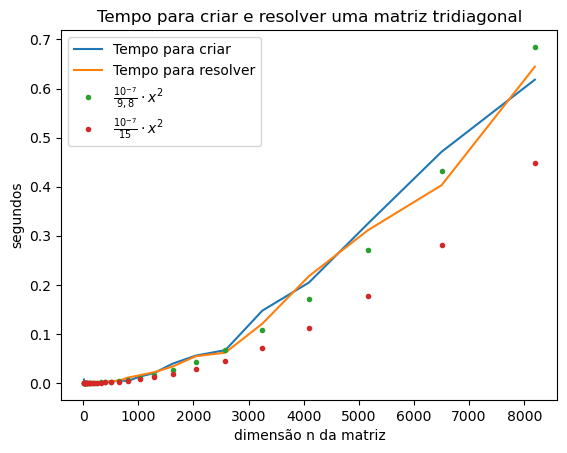

In [11]:

plt.plot(ns, t_create, label="Tempo para criar")
plt.plot(ns, t_solve, label="Tempo para resolver")
plt.plot(ns, (ns**2)/98000000, ".", label="$\\frac{10^{-7}}{9,8} \\cdot x^2$")
plt.plot(ns, (ns**2)/150000000, ".", label="$\\frac{10^{-7}}{15} \\cdot x^2$")
plt.ylabel('segundos')
plt.xlabel('dimensão n da matriz')
plt.legend()
plt.title("Tempo para criar e resolver uma matriz tridiagonal")
ax = plt.gca()

Comente

Pelo gráfico, agora com curvas de outras duas novas funções, podemos inferir a taxa de crescimento das curvas do tempo. Ambas são quadráticas, mas com inclinação, ou coeficientes, diferentes.

## Questão 3: Sistemas pentadiagonais

Agora, suponha que a matriz $A$ é pentadiagonal, ou seja, as entradas não-nulas
podem estar até 2 linhas acima ou abaixo da diagonal principal.
Generalize o seu programa para resolver sistemas pentadiagonais.

In [12]:
def pentadiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float))
    b = np.copy(np.asarray(b, dtype=np.float))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    
    max_column = np.where(A[0]!=0)[0][-1]
    zeros = m - 1 - max_column

    for k in range(0,n-1):  
        for linha in range(k+1, m-zeros):    
            fator = -(A[linha][k]/A[k][k])      
            b[linha] = b[linha] + fator*b[k]

            A[linha][k] = 0
            for coluna in range(k+1,m-zeros):
                A[linha][coluna] = A[linha][coluna] + fator*A[k][coluna] 
        
        zeros = zeros - 1 if zeros > 0 else 0

    xs = list(np.zeros(m))
    xs[m-1] = b[m-1]/A[m-1][m-1]
    
    for linha in range(m-2,-1,-1):
        n = b[linha]
        d = A[linha][linha]
        col_max = np.where(A[linha] != 0)[0][-1]
        for i in range(linha+1, col_max+1):
            n -= A[linha][i]*xs[i]
        xs[linha] = n/d
    
    return xs

In [13]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x2 = tridiag_solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x3, x2, atol=1e-13, rtol=1e-13)

C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.copy(np.asarray(A, dtype=np.float))
C:\Users\brand\AppData\Local\Temp\ipykernel_5228\2514715951.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.copy(np.asarray(b, dtype=np.float))


In [14]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,-2,-2], k=2) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

C:\Users\brand\AppData\Local\Temp\ipykernel_5228\3833292756.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.copy(np.asarray(A, dtype=np.float))
C:\Users\brand\AppData\Local\Temp\ipykernel_5228\3833292756.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.copy(np.asarray(b, dtype=np.float))


Repita os cálculos de tempo, para resolver sistemas de dimensão até $2^{13}$.

In [15]:
ns = np.logspace(4,13, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    start = time()
    dig = np.full(n-2, -5)
    A = np.diag(np.random.randint(1,100, n)) + np.diag(dig, k=2) + np.diag(dig[::-1], k=-2)
    b = np.random.randn(n)
    finish = time()
    t_create.append(finish-start)
    
    start = time()
    x = pentadiag_solve(A,b)
    finish = time()
    t_solve.append(finish-start)

C:\Users\brand\AppData\Local\Temp\ipykernel_5228\3833292756.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = np.copy(np.asarray(A, dtype=np.float))
C:\Users\brand\AppData\Local\Temp\ipykernel_5228\3833292756.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.copy(np.asarray(b, dtype=np.float))


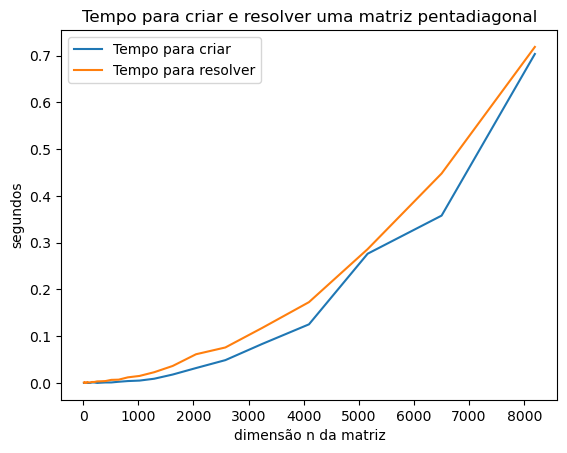

In [16]:
plt.plot(ns, t_create, label="Tempo para criar")
plt.plot(ns, t_solve, label="Tempo para resolver")
plt.ylabel('segundos')
plt.xlabel('dimensão n da matriz')
plt.legend()
plt.title("Tempo para criar e resolver uma matriz pentadiagonal")
ax = plt.gca()

In [17]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

O que mudou?

As curvas estão mais próximas, o que parece fazer sentido, porque agora o algoritmo tem mais diagonais, logo mais elementos, a considerar. Isto é, o número de elementos criados individualmente (todos de todas matrizes), está mais próximo do número de elementos acessados no algoritmo pentadiagonal (até no máximo 2 diagonais em torno da principal) quando comparado com o caso do algoritmo tridiagonal.